# Trabalho prático com K-Means
Os dados abaixo contém características que podem representar o nível de felicidade da população de um país. Além do nome do país, há atributos de índices que representam o produto interno bruto, suporte social, expectativa de vida, liberdade, generosidade e corrupção.

O objetivo deste trabalho é agrupar os países de acordo com o nível de felicidade da população. Para tanto, utilize o método K-means para criar 10 clusters com os dados de treinamento. Depois disso, avalie em qual grupo pertence cada país contido no conjunto de teste.

Submeta o script criado, a lista de países para cada um dos 10 grupos criados, e qual o grupo mais semelhante de cada um dos 6 países presentes no conjunto de teste.

## Importando bibliotecas e Dados

In [7]:
import pandas as pd
from sklearn.cluster import  KMeans
import seaborn as sns
import matplotlib.pyplot as plt

# Importando os dados
df_treino = pd.read_csv('happiness treino.csv', sep=',', decimal='.')
df_teste = pd.read_csv('happiness teste.csv', sep=',', decimal='.')

Antes de passarmos os dados para o algoritmo K-Means, primeiro vamos tentar entender os dados fornecidos, observando a matriz de correlação.

Obs: A matriz de correlação gerada pelo método `.corr()` utiliza por padrão a correlação de Pearson, indicada para relações lineares, mas suporta também o Método de Spearman e Kendall.

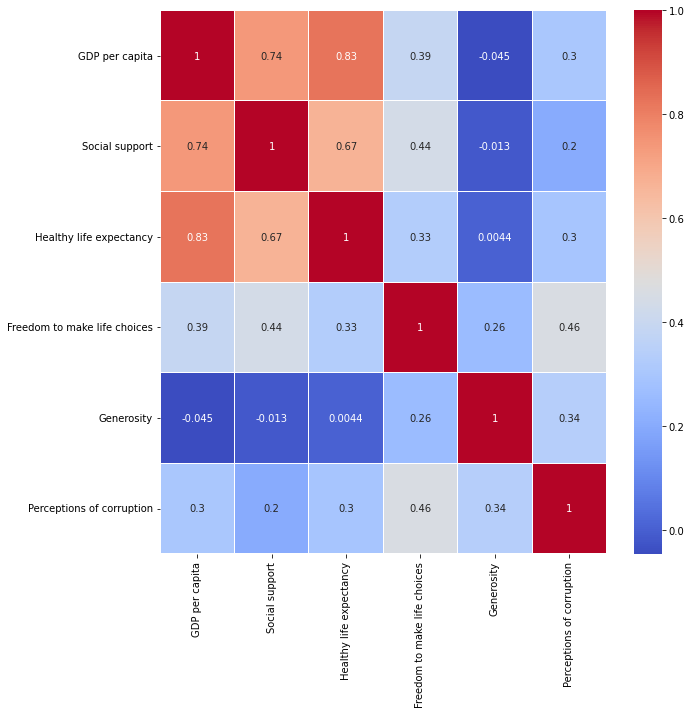

In [8]:
plt.figure(figsize=(10, 10))
sns.heatmap(df_treino.corr(), annot=True, linewidths=0.01, cmap='coolwarm', cbar=True)
plt.show()

`GDP per capita`, `Social support` e `Healthy life expectancy` são valores fortemente relacionados. Mas há uma relação, mesmo que fraca, entre `Social support` nos campos de `Perception of corruption` e `Freefom to make life choices`

## Implementando K-Means

In [9]:
kmeans = KMeans(n_clusters=10)

# Removendo paises duplicados, esta linha pode ser comentada.
df_treino.drop_duplicates(inplace=True,subset=['Country or region'])

# Pegando o nome todos os paises e regiões
clusters = pd.DataFrame(df_treino['Country or region'])

# Removendo a coluna 'Country or region'
df_treino.drop(columns='Country or region', inplace=True)

# Treinando K-Means
kmeans.fit(df_treino)


KMeans(n_clusters=10)

## Realizando Predição e exibindo os clusters com sua respectiva lista de paises

In [10]:
# Predição com dados de treinamento
pred = kmeans.predict(df_treino)

# Inserindo os valores preditos junto aos nomes dos paises
clusters['Cluster'] = pred

# Salvando em csv
clusters.to_csv('clusters.csv')

# Exibindo cluster e seus respectivos paises
for i in range(10):
  print('Cluster:', i, ' - Paises: ', clusters[clusters['Cluster'] == i]
       ['Country or region'].values, '\n', '-'*100)


Cluster: 0  - Paises:  ['Albania' 'Armenia' 'Egypt' 'Georgia' 'Iran' 'Iraq' 'Morocco' 'Tunisia'] 
 ----------------------------------------------------------------------------------------------------
Cluster: 1  - Paises:  ['Argentina' 'Bulgaria' 'Chile' 'Costa Rica' 'Croatia' 'Cyprus'
 'Czech Republic' 'Estonia' 'Greece' 'Hungary' 'Israel' 'Kazakhstan'
 'Latvia' 'Lithuania' 'Malaysia' 'Mauritius' 'Panama' 'Poland' 'Portugal'
 'Romania' 'Russia' 'Slovakia' 'Slovenia' 'South Korea' 'Spain'
 'Trinidad & Tobago' 'Turkey' 'Uruguay'] 
 ----------------------------------------------------------------------------------------------------
Cluster: 2  - Paises:  ['Burkina Faso' 'Chad' 'Comoros' 'Congo (Kinshasa)' 'Ethiopia' 'Gambia'
 'Guinea' 'Liberia' 'Madagascar' 'Mali' 'Mozambique' 'Niger' 'Senegal'
 'Sierra Leone' 'Uganda' 'Yemen' 'Zimbabwe'] 
 ----------------------------------------------------------------------------------------------------
Cluster: 3  - Paises:  ['Azerbaijan' 'Belarus' '

In [11]:
# Pegando o nome todos os paises e regiões de teste
paises_teste = pd.DataFrame(df_teste['Country or region'])

# Removendo a coluna 'Country or region'
df_teste.drop(columns='Country or region', inplace=True)

# Predição
pred_teste = kmeans.predict(df_teste)
# Inserindo os valores preditos junto aos nomes dos paises
paises_teste['Cluster'] = pred_teste

# Salvando em csv
paises_teste.to_csv('paises_teste.csv')
paises_teste


,Country or region,Cluster
0,Algeria,0
1,Bolivia,6
2,Brazil,3
3,Cambodia,6
4,Germany,4
5,Italy,1
